In [1]:
import pandas as pd
from scipy.special import expit
from sklearn.metrics import roc_auc_score

In [2]:
!cp ../../../tcrpred/scripts/dir_kicker/logs/*.csv ./

# Comparison of TCRb + TCRa in TPP-I task

# 
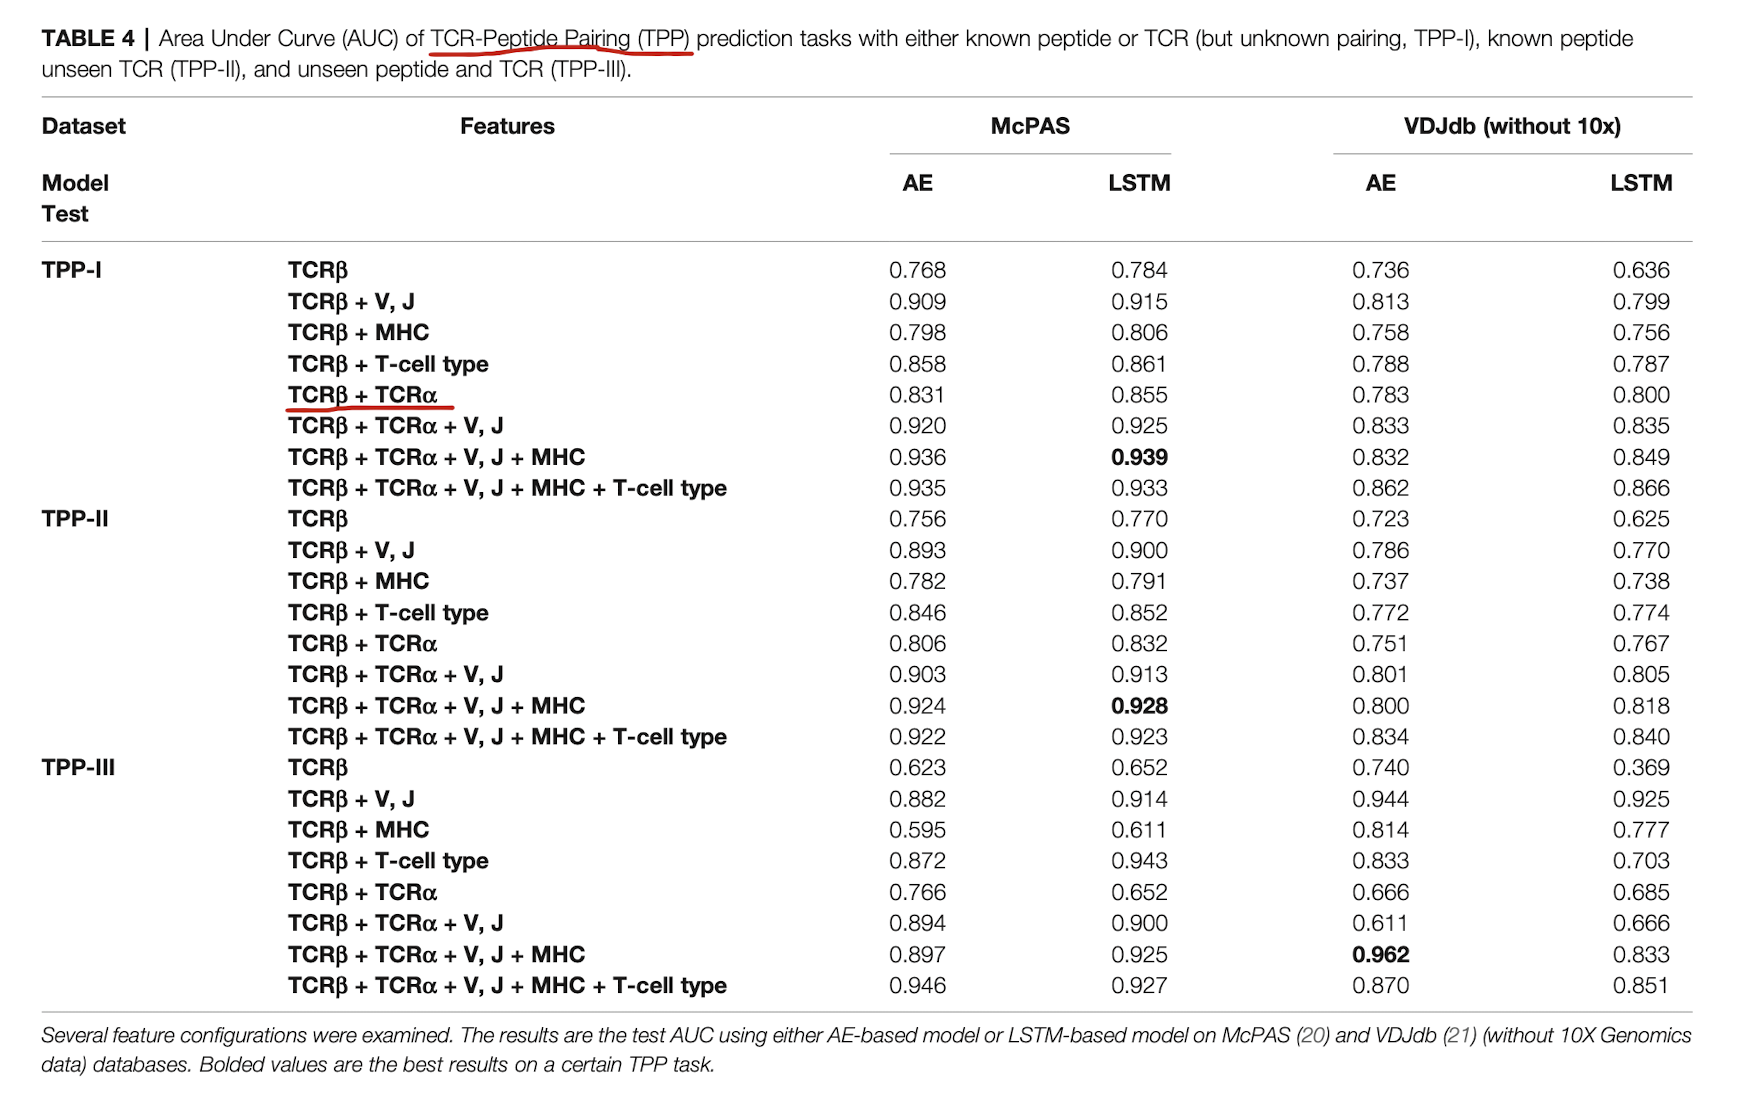

# McPAS

In [3]:
# pip3 install awscli &&\ 
# aws s3 sync s3://sg-playground-kkoyama-temp/tcrpred/hhyylog ~/jupyter_notebook/user_work/tcrpred/hhyylog

In [37]:
replace_tuple = ('~/jupyter_notebook/user_work/tcrpred/scripts/../log/', '../../hhyylog/')

logdf = pd.read_csv('files_jobid_MCPAS.csv')

hhlist = [pd.read_csv(
    p.replace(replace_tuple[0], replace_tuple[1]).replace('_hh.csv', '_test_hh.csv')
                     ).apply(expit)
          for p in logdf['hhpath'].values]

hh_ave = pd.concat([h['1'] for h in hhlist], axis=1).mean(axis=1)

yy = pd.read_csv(
        logdf['yypath'].values[0]\
        .replace(replace_tuple[0], replace_tuple[1]).replace('_yy.csv', '_test_yy.csv')
                     )
yy = yy['0']
print(hh_ave.shape, yy.shape)

(5611,) (5611,)


In [38]:
roc_auc_score(y_true=yy, y_score=hh_ave)

0.9331086762999529

# VDJDB

In [39]:
replace_tuple = ('~/jupyter_notebook/user_work/tcrpred/scripts/../log/', '../../hhyylog/')
logdf = pd.read_csv('files_jobid20210916030915vdjdbno10x_v1.csv')

hhlist = [pd.read_csv(
    p.replace(replace_tuple[0], replace_tuple[1]).replace('_hh.csv', '_test_hh.csv')
                     ).apply(expit)
          for p in logdf['hhpath'].values]

hh_ave = pd.concat([h['1'] for h in hhlist], axis=1).mean(axis=1)

yy = pd.read_csv(
        logdf['yypath'].values[0]\
        .replace(replace_tuple[0], replace_tuple[1]).replace('_yy.csv', '_test_yy.csv')
                     )
yy = yy['0']

print(hh_ave.shape, yy.shape)

(4485,) (4485,)


In [26]:
roc_auc_score(y_true=yy, y_score=hh_ave)

0.9255641285527564

In [9]:
# !mv ../../hhyylog/20210911_043036_k0_hh.csv ../../hhyylog/20210911_043036_k0_test_hh.csv 
# !mv ../../hhyylog/20210911_043036_k0_yy.csv ../../hhyylog/20210911_043036_k0_test_yy.csv 

# Single Peptide Binding Task

In [14]:
!pwd

/root/jupyter_notebook/user_work/tcrpred/analysis/comparison_ergo


In [15]:
logdf = pd.read_csv('files_SPB_LPRRSGAAGA_20211003_211844.csv')

In [16]:
replace_tuple = ('~/jupyter_notebook/user_work/tcrpred/scripts/../hhyylog/', '../../hhyylog/')

hhlist = [pd.read_csv(
    p.replace(replace_tuple[0], replace_tuple[1]).replace('_hh.csv', '_hh.csv')
                     ).apply(expit)
          for p in logdf['hhpath'].values]

hh_ave = pd.concat([h['1'] for h in hhlist], axis=1).mean(axis=1)

yy = pd.read_csv(
        logdf['yypath'].values[0]\
        .replace(replace_tuple[0], replace_tuple[1]).replace('_yy.csv', '_yy.csv')
)

yy = yy['0']
print(hh_ave.shape, yy.shape)

(5611,) (5611,)


In [18]:
roc_auc_score(y_true=yy, y_score=hh_ave)

0.5024059641263585

In [22]:
import pickle
df_test = pd.DataFrame(pickle.load(
            open(
        f"../../external_data/ERGO-II/Samples/vdjdb_no10x_test_samples.pickle",
            "rb",)))
